## 문제 설명
- 나만의 카카오 성격 유형 검사지를 만들려고 합니다. 성격 유형 검사는 다음과 같은 4개 지표로 성격 유형을 구분합니다. 성격은 각 지표에서 두 유형 중 하나로 결정됩니다.

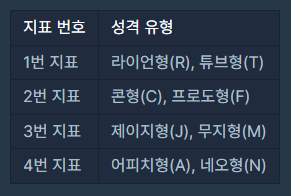

- 4개의 지표가 있으므로 성격 유형은 총 16(=2 x 2 x 2 x 2)가지가 나올 수 있습니다. 예를 들어, "RFMN"이나 "TCMA"와 같은 성격 유형이 있습니다.
- 검사지에는 총 n개의 질문이 있고, 각 질문에는 아래와 같은 7개의 선택지가 있습니다.

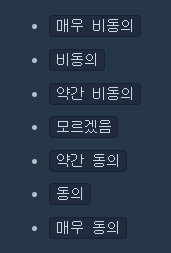

- 각 질문은 1가지 지표로 성격 유형 점수를 판단합니다.
- 예를 들어, 어떤 한 질문에서 4번 지표로 아래 표처럼 점수를 매길 수 있습니다.

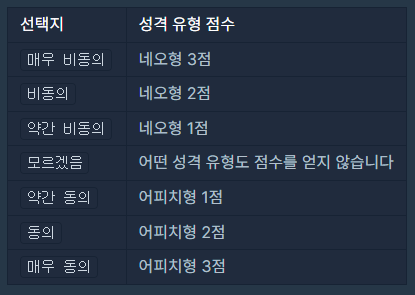

- 이때 검사자가 질문에서 약간 동의 선택지를 선택할 경우 어피치형(A) 성격 유형 1점을 받게 됩니다. 만약 검사자가 매우 비동의 선택지를 선택할 경우 네오형(N) 성격 유형 3점을 받게 됩니다.

- 위 예시처럼 네오형이 비동의, 어피치형이 동의인 경우만 주어지지 않고, 질문에 따라 네오형이 동의, 어피치형이 비동의인 경우도 주어질 수 있습니다.
하지만 각 선택지는 고정적인 크기의 점수를 가지고 있습니다.

    -매우 동의나 매우 비동의 선택지를 선택하면 3점을 얻습니다.
    -동의나 비동의 선택지를 선택하면 2점을 얻습니다.
    -약간 동의나 약간 비동의 선택지를 선택하면 1점을 얻습니다.
    -모르겠음 선택지를 선택하면 점수를 얻지 않습니다.

- 검사 결과는 모든 질문의 성격 유형 점수를 더하여 각 지표에서 더 높은 점수를 받은 성격 유형이 검사자의 성격 유형이라고 판단합니다. 단, 하나의 지표에서 각 성격 유형 점수가 같으면, 두 성격 유형 중 사전 순으로 빠른 성격 유형을 검사자의 성격 유형이라고 판단합니다.

- 질문마다 판단하는 지표를 담은 1차원 문자열 배열 survey와 검사자가 각 질문마다 선택한 선택지를 담은 1차원 정수 배열 choices가 매개변수로 주어집니다. 이때, 검사자의 성격 유형 검사 결과를 지표 번호 순서대로 return 하도록 solution 함수를 완성해주세요.

## 제한사항
- 1 ≤ survey의 길이 ( = n) ≤ 1,000
    - survey의 원소는 "RT", "TR", "FC", "CF", "MJ", "JM", "AN", "NA" 중 하나입니다.
    - survey[i]의 첫 번째 캐릭터는 i+1번 질문의 비동의 관련 선택지를 선택하면 받는 성격 유형을 의미합니다.
     -survey[i]의 두 번째 캐릭터는 i+1번 질문의 동의 관련 선택지를 선택하면 받는 성격 유형을 의미합니다.

- choices의 길이 = survey의 길이
    - choices[i]는 검사자가 선택한 i+1번째 질문의 선택지를 의미합니다.
    - 1 ≤ choices의 원소 ≤ 7

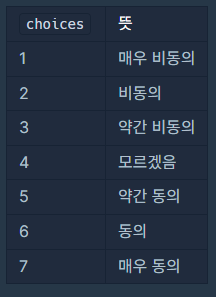

## 문제 풀이

In [9]:
survey = ["AN", "CF", "MJ", "RT", "NA"]
choices = [5, 3, 2, 7, 5]
# 이때 예상 리턴 값은 "TCMA" 입니다.

In [17]:
def solution(survey, choices):
    
    # 최종 값을 넣을 변수를 만들어 줍니다.
    answer = ''
    # 각 성격유형 종류와 점수를 딕셔너리 타입으로 선언합니다. 
    score = {'R':0, 'T':0, 'C':0, 'F':0, 'J':0,'M':0,'A':0,'N':0} 
    
    # choices의 길이만큼의 범위에서 for문을 사용하여 각 성격 유형마다 비교합니다. 
    for i in range(len(choices)):
        first = survey[i][0] # sruvey의 i 인덱스의 문자의 첫 번째 알파벳입니다.
        second = survey[i][1] # sruvey의 i 인덱스의 문자의 두 번째 알파벳입니다.
        
        if choices[i] > 4:
            score[second] += choices[i] -4
            # if 문으로 choices[0]의 값은 5라고 가정
            # 이 때 같은 survey[1]은 "AN" 질문이다.
            # "AN" 질문에서 값이 4보다 높아지면 성격유형이 N쪽으로 기운다.
            # 4 보다 1 큰 5이기 때문에 "AN" 질문에서 N 쪽으로 1점
            # 이때 second는 survey[0][1] 즉, N이다
            # score["N"]에 5(choices[0]) - 4 인 1을 더하여 저장한다.
        
        elif choices[i] < 4:
            score[first] += 4 - choices[i]
            # if 문으로 choices[1]의 값은 3라고 가정
            # 이 때 같은 survey[1]은 "CF" 질문이다.
            # "CF" 질문에서 값이 4보다 작아지면 성격유형이 C쪽으로 기운다.
            # 4 보다 1 작은 3이기 때문에 "CF" 질문에서 C 쪽으로 1점
            # 이때 first는 survey[1][0] 즉, C이다
            # score["c"]에 4 - 3(choices[1]) 인 1을 더하여 저장한다.
        
        # for을 완료하면
        # score = {'R': 0, 'T': 3, 'C': 1, 'F': 0, 'J': 0, 'M': 2, 'A': 1, 'N': 1}
        # 위와 같은 score값이 나온다.
        
    if score["R"] >= score["T"]:
        answer += "R"
    else:
        answer += "T"
    # score의 R과 T값을 비교하여 R이 T보다 같거나 크면
    # answer에 R을 추가, 아니면 "T"를 추가한다.
    # 값이 같을 땐 영어 순서대로 추가된다.
        
    # 나머지 C와F, J와M, A와N도 같은 코드를 짜준다.
    if score["C"] >= score["F"]:
        answer += "C"
    else:
        answer += "F"
            
    if score["J"] >= score["M"]:
        answer += "J"
    else:
        answer += "M"
            
    if score["A"] >= score["N"]:
        answer += "A"
    else:
        answer += "N"
    return answer

In [18]:
# 함수를 돌려보자
solution(survey, choices)

'TCMA'

### 예상 답안인 "TCMA"가 출력된다.

## 다른 사람의 풀이

In [22]:
def solution(survey, choices):
    
    # 성격 유형 문제와 값을 가진 딕셔너리 타입인 my_dict
    my_dict = {"RT":0,"CF":0,"JM":0,"AN":0}
    
    # zip을 사용하여 survey와 choices를 key와 value로 나눠 각각 A와 B에 할당
    for A,B in zip(survey,choices):
        # 만약 survey의 값이
        #  my_dict.keys() 즉, "RT","CF","JM","AN" 중에 없으면
        if A not in my_dict.keys():
            A = A[::-1] # A[::-1]을 이용해 뒤집어서 사용
            my_dict[A] -= B-4 # my_dict의 A에 해당하는 value에 B - 4 빼기
        else:
            my_dict[A] += B-4 #survey의 값이 my_dict.keys()에 있으면 B - 4 더하기
    # 위 for문을 돌리면 최종적으로
    # my_dict = {'RT': 3, 'CF': -1, 'JM': 2, 'AN': 0} 가 출력된다.
    
    result = "" # result를 선언
    
    # for문으로 my_dict.keys()의 값을 하나하나 name으로 확인한다.
    for name in my_dict.keys():
        # 예를 들어 my_dict.keys()의 첫 요소인 'RT'를 사용하여
        # my_dict['RT']의 값은 3 -> 0보다 큰 수 이므로
        # result에 name 즉, 'RT'의 1번 인덱스 값인 T가 들어간다.
        if my_dict[name] > 0:
            result += name[1]
        # 그 다음으로 my_dict.keys()의 첫 요소인 'CF'를 사용하여
        # my_dict['CF']의 값은 -1 -> 0보다 작은 수 이므로
        # result에 name 즉, 'CF'의 0번 인덱스 값인 C가 들어간다.
        elif my_dict[name] < 0:
            result += name[0]
        # 위 경우 이외에 my_dict의 value 값이 0인 key값은
        # name을 sorted로 정렬하여 맨 처음 값을 집어 넣는다.
        else:
            result += sorted(name)[0]

    return result

In [23]:
solution(survey, choices)

'TCMA'

#### 실행하면 'TCMA'가 출력된다.